In [9]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [14]:
#data on the collection of conformers for each ligand in the library
#data transcribed from csv file
conformer_count_data = [["1",1098217],["2",3316360],["3",2939541],["4",7790732],["5",3494386],["6",16040424],["7",9875275],["8",45436202],["9",49187282],["10",107007723],["11",163997069],["12",391710978],["13",437704066],["14",662524758],["15",739231507]]

#convert to dataframe
df = pd.DataFrame(conformer_count_data, columns=['X', 'Y'])

In [15]:
#derive the total number of ligands
total_ligands = 0
for pair in conformer_count_data:
    total_ligands = pair[1] + total_ligands
    
print("Total ligands", total_ligands)

Total ligands 2641354520


In [18]:
#derive total number of conformers (lig count * conf number)
total_confs = 0
for pair in conformer_count_data:
    total_confs = (int(pair[0]) * pair[1]) + total_confs
    
print("Total conformers", total_confs)

Total conformers 34665277841


In [16]:
total_ligands_str = "2,641,354,520"

In [20]:
total_conf_str = "34,665,277,841"

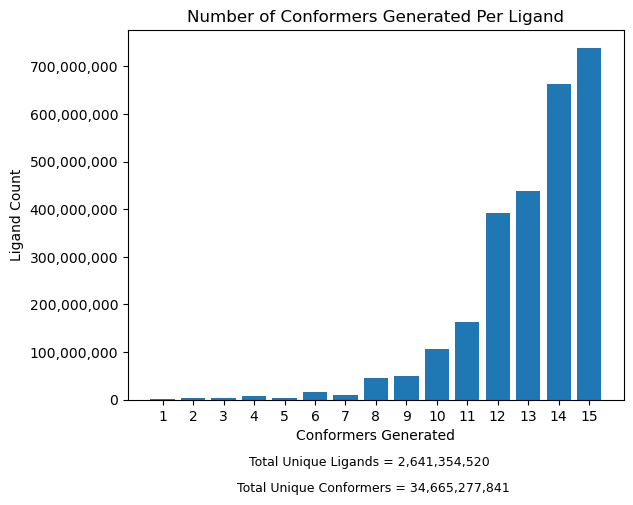

In [25]:
# Create a bar plot
plt.bar(df['X'], df['Y'])
plt.xlabel('Conformers Generated')
plt.ylabel('Ligand Count')
plt.title('Number of Conformers Generated Per Ligand')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))

# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

#add note for the text
#plt.text(3, 1, "Conformers: " + str(total_ligands), fontsize=12, color='black')
plt.annotate("Total Unique Ligands = " + str(total_ligands_str), xy=(0.245, -0.18), xycoords='axes fraction', fontsize=9, color='black')
plt.annotate("Total Unique Conformers = " + str(total_conf_str), xy=(0.22, -0.25), xycoords='axes fraction', fontsize=9, color='black')

plt.show()